In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [103]:
data=pd.read_csv('Grades.csv')

In [104]:
print('Data Shape:',data.shape)

Data Shape: (571, 43)


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [106]:
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,C-,C-,B+,D,A-,B-,C+,D+,D+,D,A,D,C-,C,C-,C+,B,C,C+,B+,C,C-,C,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,D,B+,C+,B-,C-,D+,D+,D,C,D,B-,C,D,D+,D,C-,A-,D+,C-,C-,C,A-,D,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,A-,B-,A-,A,A,A,A,A+,A,A-,A,A-,A,A,C+,A,B+,A-,B,A,B+,A-,A-,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,C+,D,B,D+,B-,D,C,B+,C+,D,D+,D,D,D+,D,B-,D,B-,D+,C-,D+,B+,C-,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,A-,C,A,A,A-,A-,A-,B-,A,A-,A,A-,A-,C+,C-,A-,B-,A-,C+,A-,A-,B-,A-,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [107]:
duplicates_count = data.duplicated().sum()
print(f"Duplicates in  data :\n  {duplicates_count} \n")

Duplicates in  data :
  0 



In [108]:
na_count = data.isna().sum()
print(f"NA values in data :\n  {na_count} \n")

NA values in data :
  Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64 



In [109]:
data.drop(columns=['CS-406','CS-412'], axis=1, inplace=True)

In [110]:
categorical_columns = data.select_dtypes(include=['object']).columns

# Fill null values with the most frequent value (mode) for each categorical column
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

## Data Analysis

In [111]:
data.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


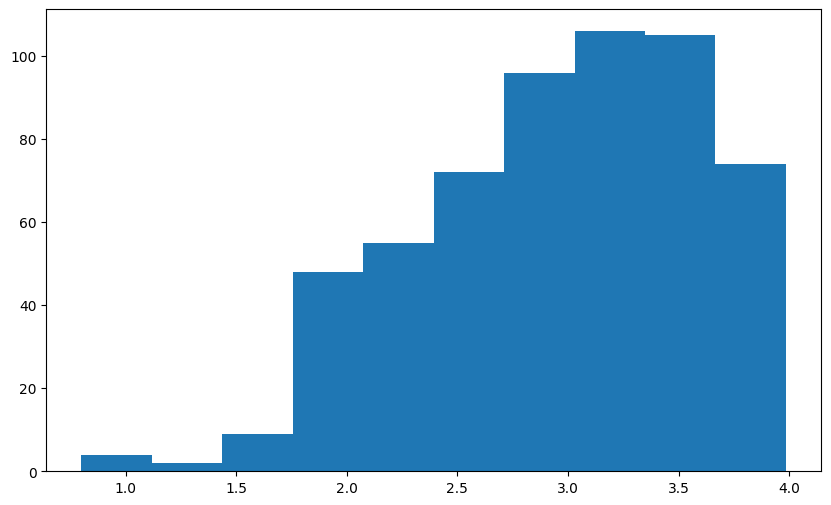

In [112]:
data['CGPA'].hist(figsize=(10,6), grid=False);

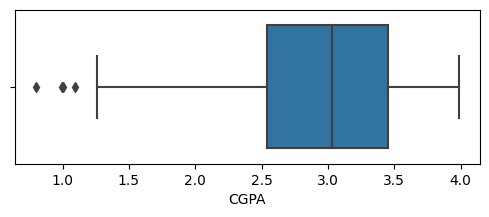

In [113]:
plt.figure(figsize=(6,2))
sns.boxplot(x = data['CGPA'])
plt.show()

In [114]:
data.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-414', 'CS-419', 'CS-423', 'CGPA'],
      dtype='object')

In [115]:
label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column is categorical
        data[column] = label_encoder.fit_transform(data[column])

In [116]:
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
0,0,5,10,8,6,8,10,9,8,5,8,8,4,9,2,5,7,10,10,9,0,9,8,6,7,7,3,6,7,4,6,8,6,8,8,8,8,0,8,3,2.205
1,1,0,9,10,9,5,6,9,0,10,9,4,7,5,8,10,10,9,6,9,5,6,9,10,8,8,2,10,8,8,6,2,9,10,9,6,9,5,6,6,2.008
2,2,0,3,0,5,4,0,5,4,2,2,5,2,0,0,0,0,1,0,2,0,2,0,0,6,0,4,2,3,0,4,2,2,3,3,0,6,0,0,2,3.608
3,3,9,7,10,9,9,2,10,8,9,7,9,3,10,5,9,6,4,7,9,10,9,9,10,8,5,9,5,10,8,10,4,8,10,6,10,8,3,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,2,6,0,0,2,2,2,5,0,2,0,2,2,7,7,2,5,2,7,2,2,5,2,5,4,4,5,0,2,2,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,0,2,1,0,2,2,1,4,1,0,1,0,0,0,0,1,0,0,3,2,0,2,2,2,0,1,1,0,0,4,2,2,0,0,4,4,3,3.798
567,567,1,0,0,0,0,0,0,2,0,0,1,4,7,2,3,0,0,1,1,0,0,3,0,0,0,0,0,0,1,0,1,2,4,4,0,0,3,2,6,3.772
568,568,3,0,2,4,0,0,0,0,0,3,1,5,3,4,3,2,0,4,3,0,4,3,0,2,5,4,4,0,4,3,7,4,2,3,0,4,6,4,2,3.470
569,569,0,4,9,0,9,10,5,8,5,8,1,7,9,9,3,5,3,5,6,5,10,10,7,8,6,6,7,8,8,9,5,4,9,3,3,8,6,3,5,2.193


In [117]:
df_corr = data.corr()['CGPA'].sort_values(ascending=False)
df_corr

CGPA         1.000000
Seat No.     0.054342
CS-414      -0.384003
CS-312      -0.458019
HS-205/20   -0.460525
EF-303      -0.485478
MT-331      -0.508428
CS-423      -0.520968
CS-106      -0.534995
HS-101      -0.537170
CS-403      -0.544543
HS-304      -0.557912
CS-318      -0.566393
TC-383      -0.572329
EE-222      -0.575335
MT-442      -0.582592
CS-105      -0.613169
HS-105/12   -0.613989
CS-107      -0.615309
CS-211      -0.628070
CS-421      -0.633001
CS-419      -0.641804
EL-102      -0.642262
CS-212      -0.642878
CS-203      -0.644191
EE-119      -0.646829
EE-217      -0.655993
MT-222      -0.656320
CY-105      -0.658282
ME-107      -0.663023
PH-121      -0.663135
CS-301      -0.664117
MT-224      -0.692696
CS-302      -0.696112
CS-306      -0.708299
EL-332      -0.729609
MT-111      -0.730095
CS-215      -0.730460
CS-214      -0.733848
CS-317      -0.760792
CS-210      -0.761468
Name: CGPA, dtype: float64

In [118]:
data=data.drop(columns=['Seat No.'],axis=1)

## Model

In [119]:
X = data.drop("CGPA",axis=1)
Y = data["CGPA"]

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=45)

In [121]:
def plot_results(test, pred, model_name):
    fig, ax = plt.subplots(figsize=(15, 4))
    x_axis = np.arange(0, test.shape[0], 1)
    sns.lineplot(y=test, x=x_axis, label='Actual', color='mediumblue')
    sns.lineplot(y=pred, x=x_axis, label='Predicted', color='red')
    ax.set(xlabel="Values", ylabel="Target", title=f"{model_name}_Actual_vs_Prediction")
    ax.legend()
    sns.despine()
    plt.show()

In [122]:
DT = DecisionTreeRegressor()
model = DT.fit(X_train, Y_train)
Y_pred = model.predict(X_test) 

mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 0.18
R-squared (R²): 0.86


In [124]:
rf = RandomForestRegressor()
model = rf.fit(X_train, Y_train)
Y_pred = model.predict(X_test) 

mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 0.11
R-squared (R²): 0.94


In [126]:
xg = XGBRegressor()
model = xg.fit(X_train, Y_train)
Y_pred = model.predict(X_test) 

mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 0.12
R-squared (R²): 0.92


In [128]:
# Define the parameters grid for GridSearchCV
param_grid = {
    'n_estimators': [60,80,100,120,150,200],  # Number of boosting rounds
    'max_depth': [3, 5, 7,9,11],           # Maximum tree depth
}

xg = XGBRegressor(tree_method='gpu_hist') 
# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=3, verbose=1, n_jobs=1)

# Fit GridSearchCV to the data
grid_result = grid_search.fit(X_train, Y_train)



Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [129]:
# Get the best parameters and the best score
best_params = grid_result.best_params_
best_score = grid_result.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score (MAE): {-best_score:.2f}")

# Use the best model for prediction
best_model = grid_result.best_estimator_
Y_pred = best_model.predict(X_test)

# Calculate metrics for the best model
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error (MAE) for best model: {mae:.2f}')
print(f'R-squared (R²) for best model: {r2:.2f}')


Best Parameters: {'max_depth': 3, 'n_estimators': 200}
Best Score (MAE): 0.13
Mean Absolute Error (MAE) for best model: 0.09
R-squared (R²) for best model: 0.96


In [130]:
# Built-in feature importance (Gini Importance)
importances = best_model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

      Feature  Gini Importance
33     CS-317         0.233612
29     EL-332         0.182313
4      MT-111         0.101596
15     CS-210         0.082967
0      PH-121         0.049576
5      CS-105         0.042425
20     CS-212         0.038341
21     CS-215         0.034461
18     CS-214         0.028155
10     CS-107         0.020401
26     CS-302         0.017814
14     MT-224         0.017814
30     CS-318         0.017524
19     EE-217         0.015955
2      CY-105         0.014878
25     CS-301         0.011878
31     CS-306         0.010011
7      EL-102         0.009099
24     HS-304         0.008802
27     TC-383         0.008100
9      ME-107         0.006940
6      CS-106         0.006535
16     CS-211         0.005872
35     CS-421         0.005674
13     EE-222         0.004352
36     CS-414         0.003133
12     MT-222         0.003087
11  HS-205/20         0.002644
17     CS-203         0.002461
3   HS-105/12         0.002391
8      EE-119         0.001832
37     C

In [132]:
# removing less important features

In [133]:
feature_imp_df[feature_imp_df['Gini Importance']>0.01]

,Feature,Gini Importance
33,CS-317,0.233612
29,EL-332,0.182313
4,MT-111,0.101596
15,CS-210,0.082967
0,PH-121,0.049576
5,CS-105,0.042425
20,CS-212,0.038341
21,CS-215,0.034461
18,CS-214,0.028155
10,CS-107,0.020401


In [134]:
cols=feature_imp_df[feature_imp_df['Gini Importance']>0.01]['Feature'].values.tolist()

In [135]:
X_train=X_train[cols]
X_test=X_test[cols]

# Final Training

In [136]:
xg = XGBRegressor(**best_params)
final_model = xg.fit(X_train, Y_train)
Y_pred = final_model.predict(X_test) 

mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 0.12
R-squared (R²): 0.94


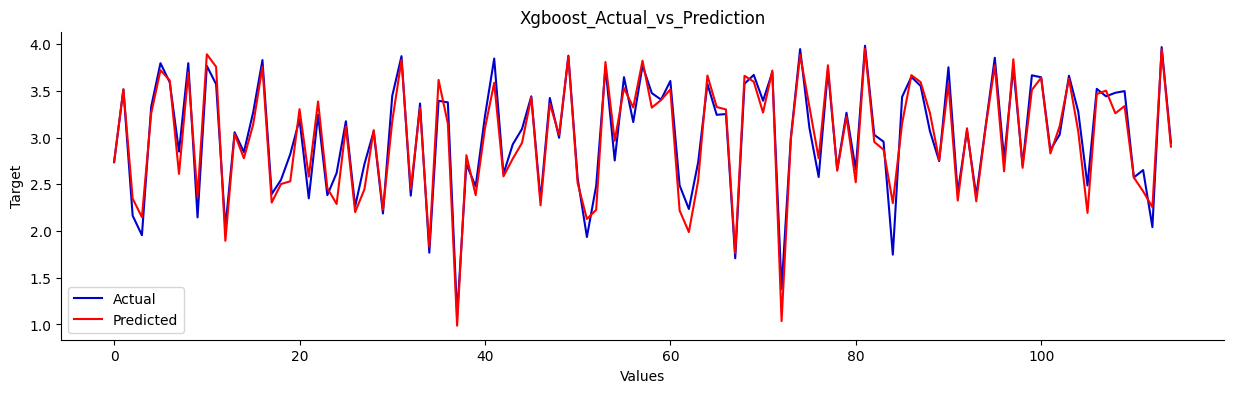

In [137]:
plot_results(Y_test,Y_pred,"Xgboost")

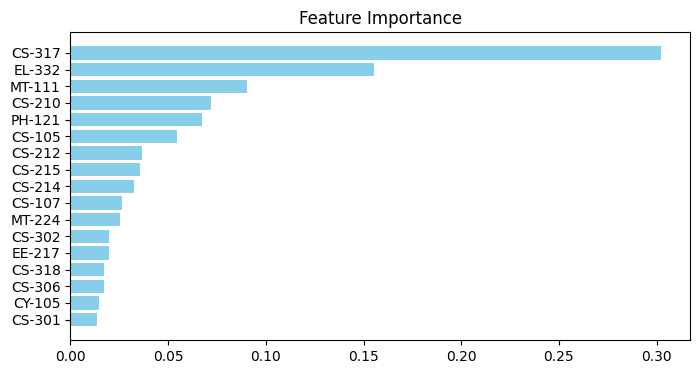

In [138]:
# Built-in feature importance (Gini Importance)
importances = final_model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Gini Importance'], color='skyblue')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 
plt.show()

 #  Hence here Xgboost model are best to predict the Grades